In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Discrete Distributions

## Binomial Distribution

The probability that you will win a certain game is 0.4. You're playing this game 4 times. 
- Construct probability table
- Draw probability histogram

### 1. Assign n and p

In [2]:
# n --> trial sayısı (Deneme sayısı)
# p --> olasılık

n = 4

p = 0.4

### 2. Use stats.binom()

In [3]:
stats.binom(n, p)

In [4]:
binomDist = stats.binom(n, p)

In [12]:
binomDist.args

# binomDist'in argümanları

(4, 0.4)

 ### 3. Use pmf method

In [13]:
# nimomDist'in içinde trial sayısı ve probability değerleri vardı zaten.
# success'i yani bize sorulan 2 defa kazanma ihtimalini parametre olarak giriyoruz.

binomDist.pmf(2)

# 4 oyundan 2'sini kazanma olasılığımız 34.5%

0.3456000000000001

In [14]:
binomDist.pmf(4)

# # 4 oyunu da kazanma olasılığı % 2.5 gibi düşük bir olasılık çıktı.

0.025600000000000008

In [15]:
binomDist.pmf(1)

# oyunlardan 1'ini kazanma olasılığı 

0.3456000000000001

### 4. Construct discrete probability distribution table

In [9]:
dist = []

for i in range(n+1):  # 1'den 4 dahil tekrar sayısını belirlerken range 5 yapmam lazım. 
    dist.append(binomDist.pmf(i))  # i, 4 oyun oynandığında kazanma sayısı
    print("P(X=" + str(i) + ")" + ":\t" + str(binomDist.pmf(i)))

# bu olasılıkların hepsinin toplamı 1 oluyor.

P(X=0):	0.1296
P(X=1):	0.3456000000000001
P(X=2):	0.3456000000000001
P(X=3):	0.15360000000000007
P(X=4):	0.025600000000000008


In [10]:
binomDist.pmf(10)

# discrete dağılım olduğu için  (bunun histogram plotunu gözünün önüne getir)
# 0,1,2,3 ve 4 haricinde değer olmadığı için bunlar dışındaki karşılıkları hep 0 olacaktır.

0.0

### 5. Draw histogram

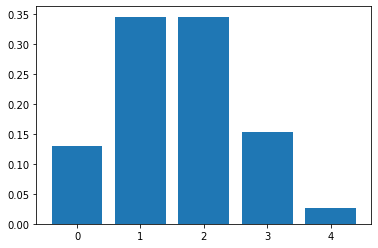

In [11]:
# olasılık değerlerinin hepsini dist adlı listenin içine almıştım.

plt.bar(list(range(n+1)), dist)
plt.show;


# hiç oyun kazanamama olasılığı 0.12 civarı, 1 ve 2 oyun kazanma olasılığı 0.35 civarı,
# 3 oyun kazanma olasılığı 0.15 civarı ve 4 oyun kazanma olasılığı 0.2 civarı

# right skewed olduğunu anlıyoruz.

### 6. Calculate the first four moments

In [13]:
# .stats() metodunu kullanacağız. 
# bu istatistiksel verileri içinde saklayan ve değişkene atayarak görüntüleyebileceğimiz bir metottur.

binomDist.stats()

# içinde istatistik değerleri saklıyor. sonra istediğin değeri bundan çekebiliyorsun.

(array(1.6), array(0.96))

In [15]:
# mean = expected value (ortalama). 
# bütün value'ları olasılıklar ile çarpıp daha sonra bunları toplayınca mean'i buluyorduk.

mean, var = binomDist.stats()

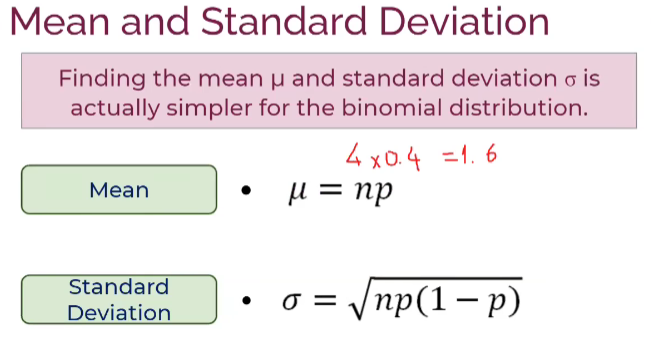

In [16]:
mean

array(1.6)

In [26]:
var

array(0.96)

In [17]:
mean, var, skew, kurt = binomDist.stats(moments = "mvsk")

In [18]:
skew

#skewness

array(0.20412415)

In [29]:
binomDist.std()

# standart deviation

0.9797958971132712

In [31]:
# variance, standart deviation'un karesi idi:

variance = binomDist.std() ** 2
variance

0.96

### 7. Use cdf method

In [ ]:
# CDF : kümülatif..(kendisinden önceki successlerin değerleri dahil olasılıkların toplamları) 

# 4 oyun oynadınız ve en fazla 2 oyun kazanma ihtimali gibi

In [20]:
# 4 oyun oynadın ve en fazla 2 oyun kazanma ihtmalini bul dendiğinde:
   # 0'dan 2'ye kadar olan oyun kazanma olasılıklarını toplamam gerekir. 
    # (0, 1 veya 2 oyun kazandığımda bu success gerçekleşmiş olur)

dist[0] + dist[1] + dist[2]  

# bu şekilde de hesaplayabiliriz ama esas .cdf() metodu ile yapalım. 

0.8208000000000002

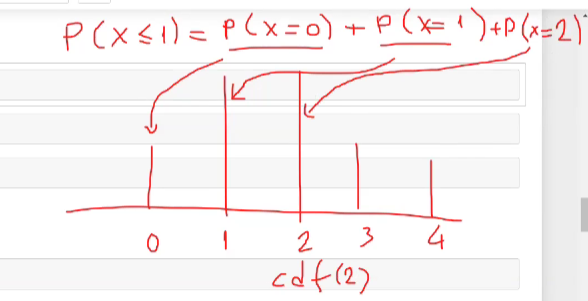

In [19]:
binomDist.cdf(2)

# .cdf() metodu ile yaptık. küsüratlar hariç aynı değeri bulduk

0.8208

In [21]:
# en fazla 3 oyun kazanma ihtimali?

dist[0] + dist[1] + dist[2] + dist[3]

0.9744000000000003

In [22]:
binomDist.cdf(3)

0.9744

### 8. Use rvs method

In [41]:
list1 = binomDist.rvs(50)

In [42]:
mean_value = sum(list1) / len(list1)
mean_value

# mean = binomDist.stats() ile yaptığımda mean=1.6 çıkmıştı.

# 100 oyun oynarsam ortalama 1.54'unu kazanabilirim demektir.

1.54

In [43]:
list2 = binomDist.rvs(1000)

In [44]:
mean_value = sum(list2) / len(list2)
mean_value

# mean = binomDist.stats() ile yaptığımda mean=1.6 çıkmıştı.

# 1000 oyun oynarsam ortalama 1.602'sini kazanabilirim demektir.

# tekrar sayısını arttırdığımda hesaplanan mean değerine yakınsıyor!

1.602

EXERCISE

In the old days, there was a probability of 0.8 of success in any attempt to make a telephone call. (This often depended on the importance of the person making the call, or the operator's curiosity!)

Calculate the probability of having 7 successes in 10 attempts.

In [46]:
p = 0.8
n = 10

In [47]:
distribution = stats.binom(n, p) 

In [48]:
distribution.pmf(7)

0.20132659200000014

P(X <= 7) = ?

In [49]:
distribution.cdf(7)

0.3222004736

P(X < 7) = ?

In [50]:
distribution.cdf(6)

0.12087388159999987

# Continuous Distributions

## Normal Distribution

### 1. Define a standard normal distribution using stats.norm

In [53]:
(mu, sigma) = (0, 1)

In [54]:
normDist = stats.norm(mu, sigma)

# dersin başında stats.binom() ile binom dağılımı oluşturmuştuk.
# bu defa stats.norm() ile normal dağılım oluşturduk.

In [55]:
normDist.args

(0, 1)

### 2. Use pdf method

In [56]:
# discrete dağılımlarda pmf idi. continious dağılımda bu pdf oldu.

normDist.pdf(0)


0.3989422804014327

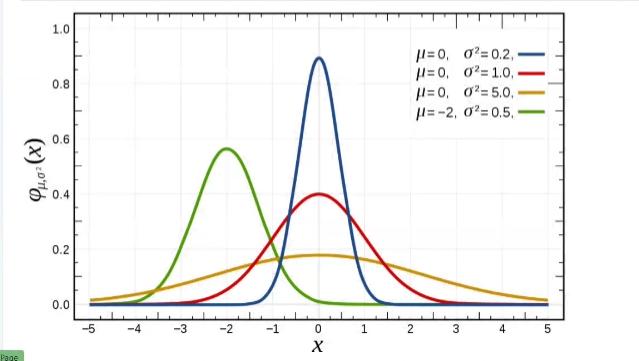

In [57]:
normDist.pdf(1)

0.24197072451914337

### 3. Use cdf method

### P(−2 < Z < 2) = ?

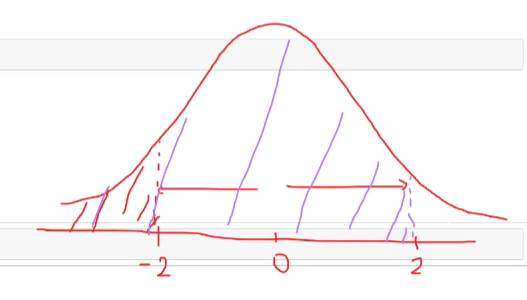

In [58]:
normDist.cdf(2) - normDist.cdf(-2)

# emprical rule'a göre de normal standart dağılımda std -2 ile 2 arası toplam alan yüzdesi bu idi.  

0.9544997361036416

### P(−3 < Z < 3) = ?

In [54]:
# emprical rule'a göre std -3 ile 3 arası %99.7'e denk geliyordu. 

normDist.cdf(3) - normDist.cdf(-3)

0.9973002039367398

### P(−1 ≤ Z ≤ 2) = ?

In [62]:
normDist.cdf(2) - normDist.cdf(-1)

0.8185946141203637

- μ = 100
- σ = 10
- P(110 ≤ X) = ?

In [64]:
1 - stats.norm.cdf(110, 100, 10)

# ortalaması 100, standart sapması 10 olan bir dağılımda 110'a kadar olan olasılığı 15.8 % bulduk
# demek ki o popülasyonda (değerler mesela ağırlıklar olsun) 110kg. üzerinde olan insanların oranı 15.8% imiş

0.15865525393145707

### EXERCISE

Suppose scores on an IQ test are normally distributed. If the test has a mean of 100 and a standard deviation of 10, what is the probability that a person who takes the test will score between 90 and 110?

In [60]:
mu=100
sigma=10

In [61]:
test_dist = stats.norm(mu, sigma)

In [63]:
test_dist.cdf(110) - test_dist.cdf(90)

0.6826894921370859

## t Distribution

- Acme Corporation manufactures light bulbs. The CEO claims that an average Acme light bulb lasts 300 days. 
- A researcher randomly selects 15 bulbs for testing. 
- The sampled bulbs last an average of 290 days, with a standard deviation of 50 days. 
- If the CEO's claim were true, what is the probability that 15 randomly selected bulbs would have an average life of no more than 290 days?

In [ ]:
n = 15

### Session-8'in sonundaki soru

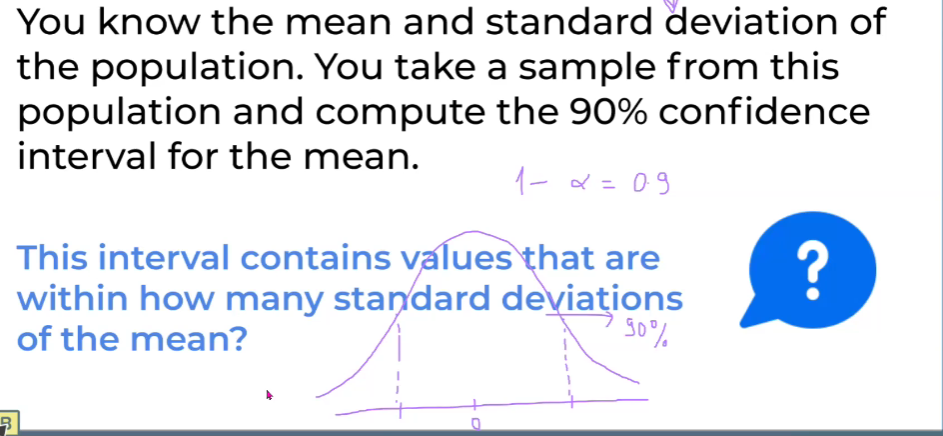

In [65]:
normDist.args

(0, 1)

In [66]:
normDist.ppf(0.95)

# z = 1.64485 çıktı.

# mean'den sola ve sağa doğru 1.645 standart sapma gittiğinde aradaki alan 90% dır. 

1.6448536269514722

Tablodan 90% a karşılık gelen z değerinin 1.645 olduğuna dikkat et.

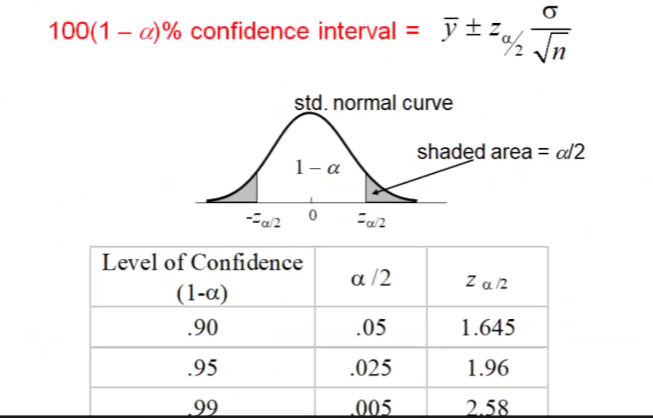

In [68]:
normDist.cdf(1.6448536269514722)

# cdf'e variable değer girilir, o değere kadar olan kümülatif toplam yüzdeyi verir.

# ppf, cdf'in inverse tersidir. ppf'e kümülatif toplam yüzde girilir, sonuç variable değer çıkar.

0.95